Sentiment Analysis: Data Processing, Visualization, and Model Evaluation.

📌 Introduction
In this study, we analyzed a text-based dataset with sentiment labels, following three main steps: data preprocessing, visualization, and model testing.

First, we cleaned and normalized the data to ensure consistency. Then, we explored the dataset using visualizations such as boxplots, bar charts,lineplot and scatterplot to identify trends and relationships. Finally, we tested different machine learning models for sentiment classification, comparing their accuracy and performance.

With these steps completed, we now evaluate the results and potential improvements.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sentimentdataset.csv')

Data Overview

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Data Cleaning

In [ ]:
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip().str.capitalize()

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

# Check for missing values
df.isnull().sum()

,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0
Year,0


Exploratory Data Analysis

Sentiment Distribution, only the top 20 most used sentiments for improve the visualization.

<ipython-input-8-ed280e67455c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)


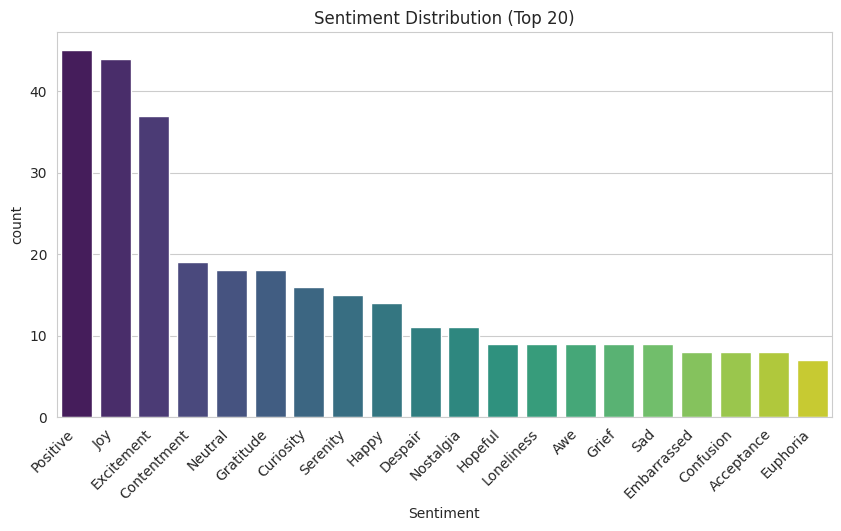

In [ ]:
sns.set_style("whitegrid")
# Get the top 20 most used sentiments
top_20_sentiments = df["Sentiment"].value_counts().nlargest(20).index
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)
plt.title("Sentiment Distribution (Top 20)")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better visibility

plt.show()


Posts by Platform

<ipython-input-9-432d426e5902>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Platform"], palette="pastel")


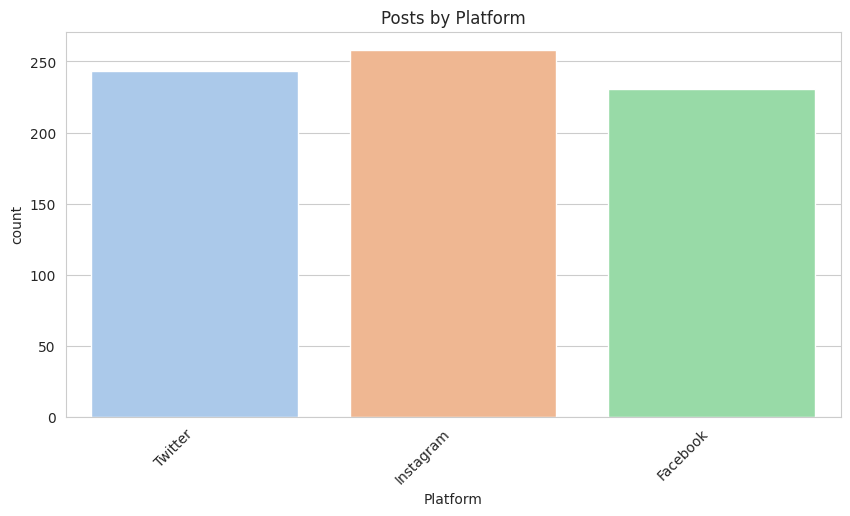

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(x=df["Platform"], palette="pastel")
plt.title("Posts by Platform")
plt.xticks(rotation=45, ha="right")

plt.show()

Likes by Sentiment (Positive and Negative)

<ipython-input-10-108a8d557ec7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})


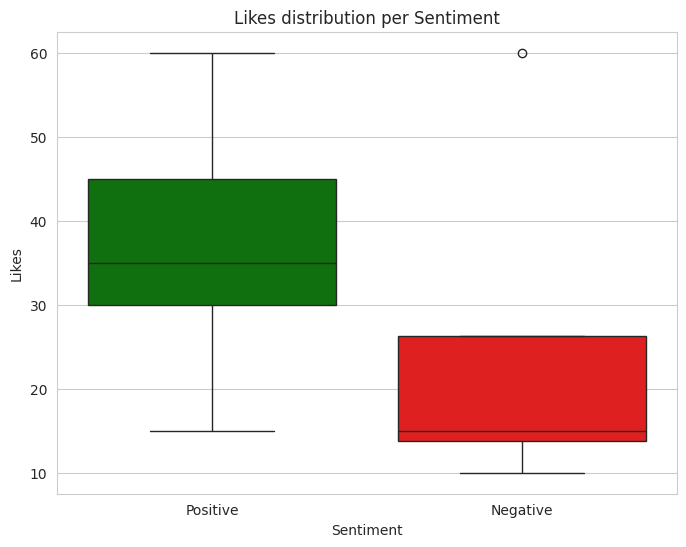

In [ ]:
# Filter sentiments "Positive" and "Negative"
df_filtered = df[df['Sentiment'].isin(['Positive', 'Negative'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})

plt.title('Likes distribution per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')

plt.show()

Average Likes per hour

<ipython-input-11-58dc4d15b979>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)


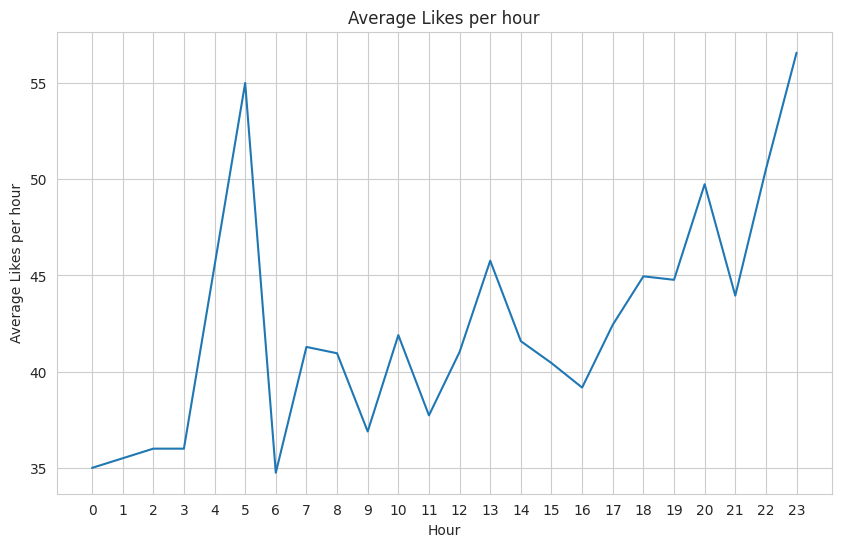

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)
plt.title("Average Likes per hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes per hour")
plt.xticks(range(0, 24))
plt.show()

Average Likes for each Plataform

<ipython-input-12-7e58e3432d0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")


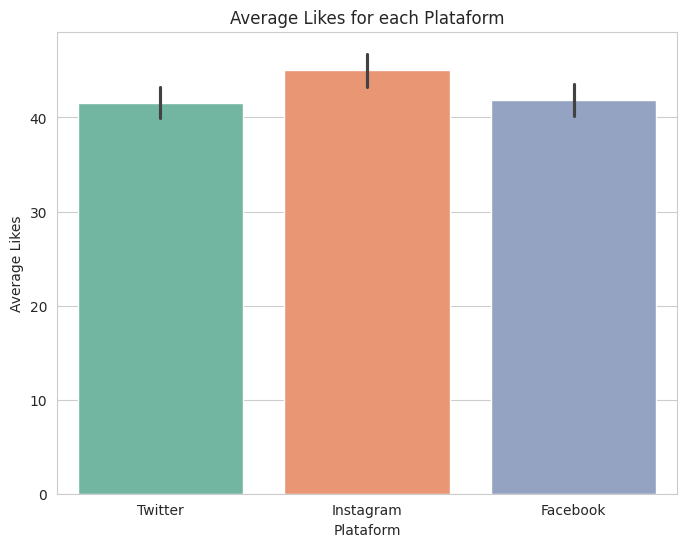

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")
plt.title("Average Likes for each Plataform")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()


Average Likes per Sentiment (Top 20)

<ipython-input-13-c9597a47ea2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


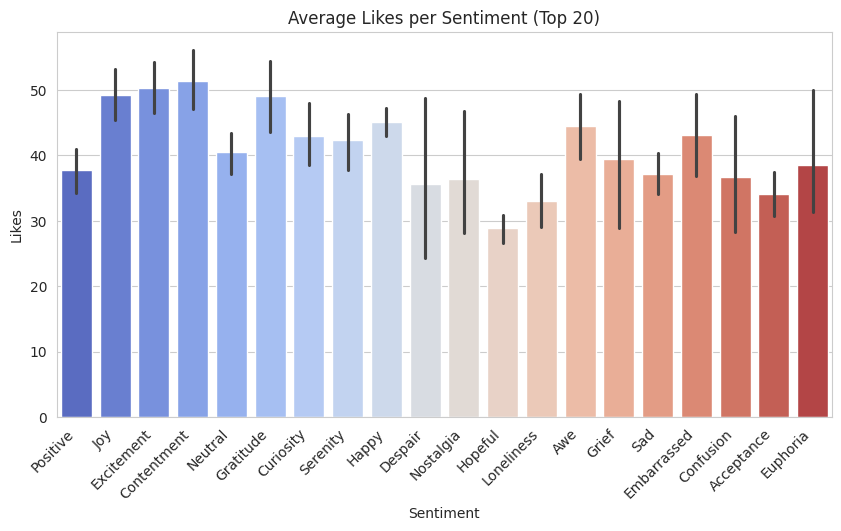

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"],
    y=filtered_df["Likes"],
    palette="coolwarm",
    order=top_20_sentiments
)
plt.title("Average Likes per Sentiment (Top 20)")
plt.xticks(rotation=45, ha="right")

plt.show()

Correlation between Retweets and Likes.


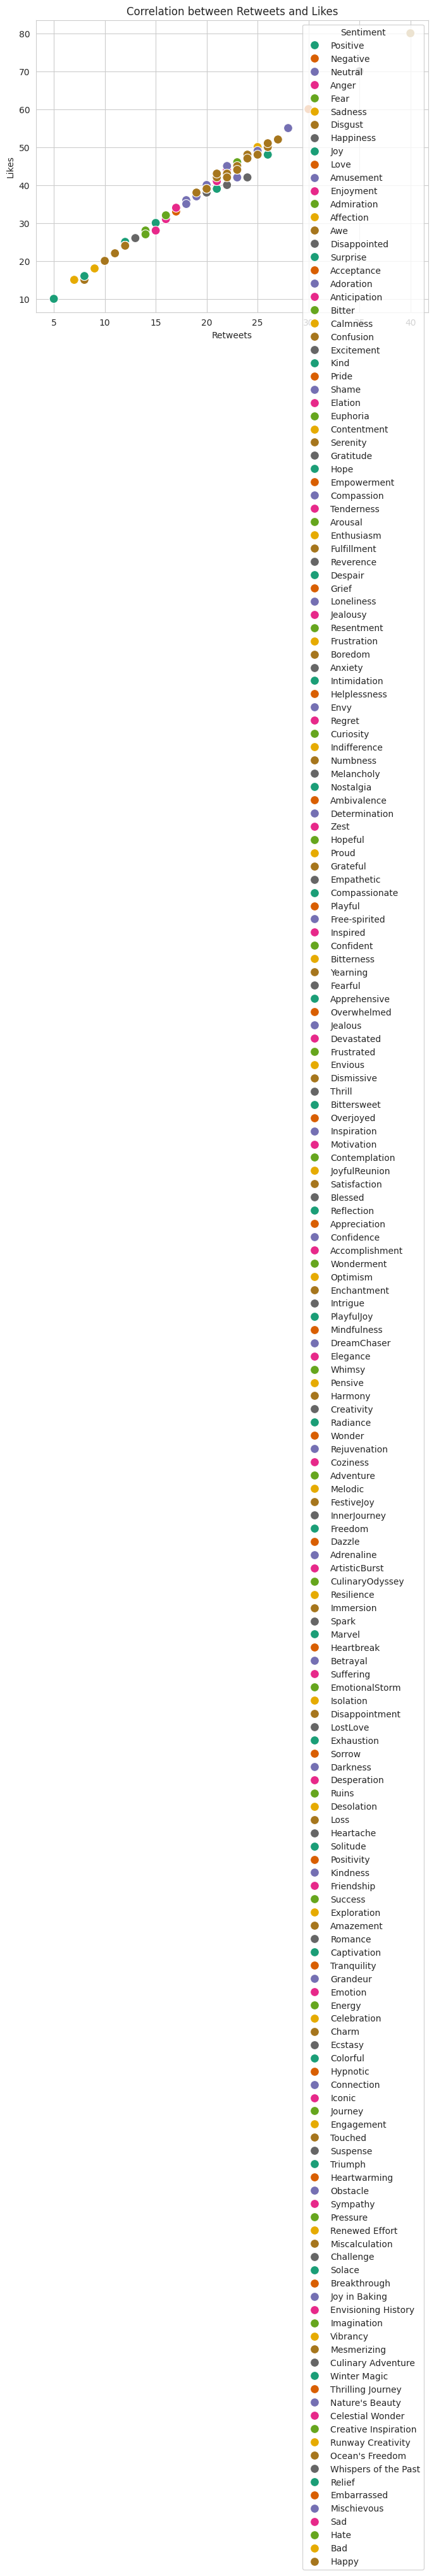

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df["Retweets"], y=df["Likes"], hue=df["Sentiment"], palette="Dark2", s=100)
plt.title("Correlation between Retweets and Likes")

plt.show()

Graph Connecting Words with Sentiments

.Red nodes represent the 20 most common sentiments.

.Blue nodes represent the 50 most frequently used words.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


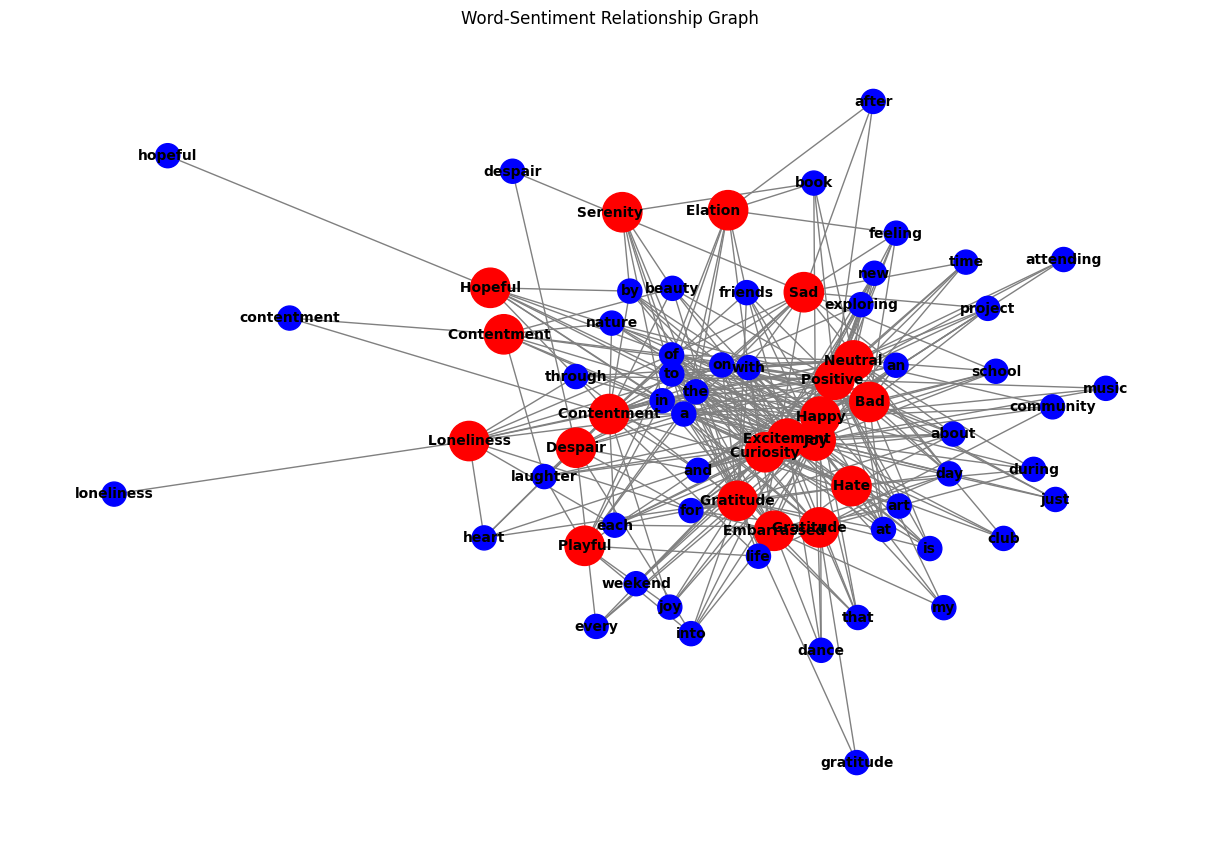

In [ ]:
# Ensure you have the necessary NLTK data
!pip install nltk
import nltk # Make sure networkx is imported as nx
import networkx as nx # import networkx here
import pandas as pd # Import pandas
from nltk.tokenize import word_tokenize # Import word_tokenize here

nltk.download('punkt')
nltk.download('punkt_tab') # Download the 'punkt_tab' data package

# Load the dataframe (assuming it's in 'sentimentdataset.csv')
df = pd.read_csv('/content/sentimentdataset.csv') # Load the dataframe here


# Create a NetworkX graph
G = nx.Graph()

# Assuming 'df' is your original DataFrame
# Get the top 20 most used sentiments (recreating filtered_df)
top_20_sentiments = df["Sentiment"].value_counts().nlargest(20).index
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]


# Tokenize words from the "Text" column and count occurrences
word_sentiment_edges = []
word_counts = Counter()

for _, row in filtered_df.iterrows():
    words = word_tokenize(row["Text"].lower())  # Tokenize and convert to lowercase
    sentiment = row["Sentiment"]

    for word in words:
        if word.isalpha():  # Only keep alphabetic words (remove punctuation, numbers)
            word_counts[word] += 1
            word_sentiment_edges.append((word, sentiment))

# Select the **most frequent words** to avoid clutter (Top 50 words)
top_words = [word for word, count in word_counts.most_common(50)]# Add nodes (Sentiments and Words)
for sentiment in top_20_sentiments:
    G.add_node(sentiment, color="red", size=800)  # Sentiments in Red

for word in top_words:
    G.add_node(word, color="blue", size=300)  # Words in Blue

# Add edges only if the word is in the top 50
for word, sentiment in word_sentiment_edges:
    if word in top_words:
        G.add_edge(word, sentiment)

# Extract node colors and sizes
node_colors = [G.nodes[node]["color"] for node in G.nodes()]
node_sizes = [G.nodes[node]["size"] for node in G.nodes()]

# Draw the graph
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
# The following line was incorrectly indented, causing the error.
# It should be aligned with the 'plt.figure' line above.
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=node_sizes, edge_color="gray", font_size=10, font_weight="bold"
)

plt.title("Word-Sentiment Relationship Graph")
plt.show()

.An edge between a blue node and a red node indicates a strong relationship between the word and the sentiment.

Sentiment Prediction

Naive Bayes classifier

In [ ]:
# Prepare data for modeling
from sklearn.model_selection import train_test_split # Import train_test_split here
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

X = df['Text']
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB here

model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

Accuracy: 0.14
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1
         Bitter         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

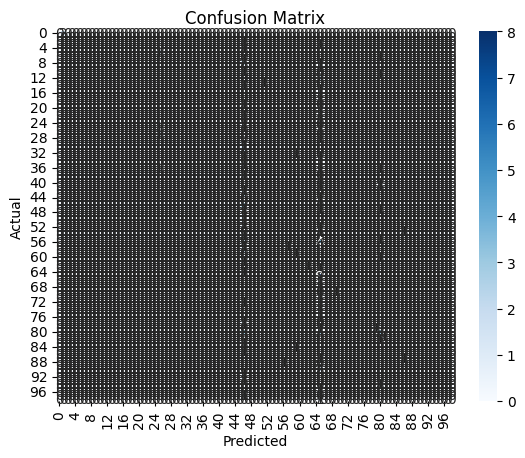

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary functions
import seaborn as sns # Import seaborn here
import matplotlib.pyplot as plt # Import plt here


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TF-IDF + Logistic Regression

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer here
from sklearn.linear_model import LogisticRegression # Import LogisticRegression here

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate
y_pred = model.predict(X_test_vec)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.14
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Random Forest

In [ ]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier here

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
# Classification report
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.27
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
       Accomplishment        0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           1.00      1.00      1.00         1
      Ambivalence            0.50      1.00      0.67         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              1.00      1.00      1.00         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
               Awe           0.00      0.00      0.00         0
         Awe                 0.00      0.00      0.00         1
          

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

📌 Conclusion

After testing different sentiment classification models, we observed significant variations in accuracy:

Naive Bayes achieved 22% accuracy, indicating that the model struggled to capture meaningful patterns from the text.

TF-IDF + Logistic Regression also reached 22%, suggesting that while TF-IDF is a more advanced vectorization method, logistic regression did not provide significant improvements in this case.

Random Forest achieved 42% accuracy, making it the best-performing model among those tested. This suggests that it was better at capturing relationships between words and sentiments, even without using deep learning techniques.